## Network of thrones

Taken from: https://www.macalester.edu/~abeverid/thrones.html

In [1]:
%matplotlib inline

from operator import itemgetter
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../helper_libraries')

import os
from io import StringIO
from IPython.display import SVG, display
from collections import Counter

from utilities import plot_network
from utilities import dict_to_values
from utilities import get_all_node_metrics

In [2]:
df = pd.read_csv("../../data/stormofswords.csv")

In [3]:
df.head()

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5


In [4]:
G = nx.from_pandas_edgelist(df, "Source", "Target")

In [5]:
len(G.nodes)

107

In [6]:
len(G.edges)

352

In [7]:
G = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Weight")

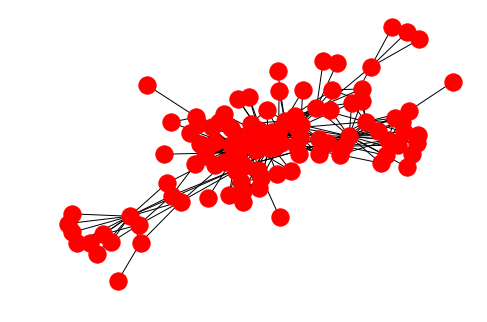

In [8]:
nx.draw(G)

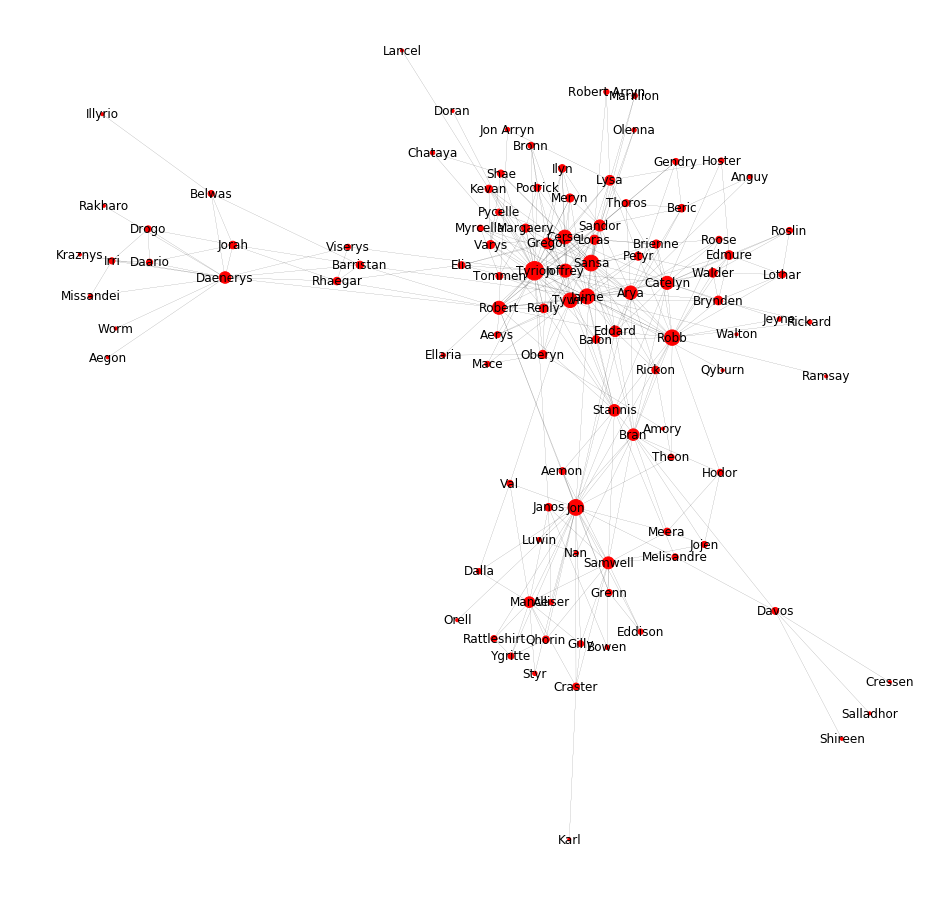

In [9]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_network(G, nx.degree_centrality(G), factor=1000, width=0.1)

(array([15., 10.,  1.,  3.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

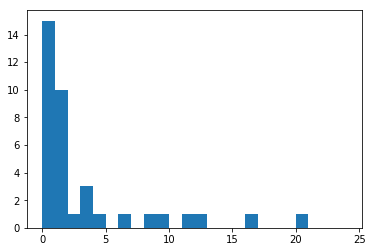

In [10]:
plt.hist(nx.degree_histogram(G), bins=range(25))

In [11]:
nx.average_shortest_path_length(G)

2.903897019925939

In [12]:
np.mean(dict_to_values(G, nx.clustering(G)))

0.551443151559996

## Network simulation

* This part we do simulation to compare network types
* Use Random, pref, small world

In [13]:
success = False
while not success:
    try:
        G_small = nx.watts_strogatz_graph(n=107, k=2, p=0.4)
        print(nx.average_shortest_path_length(G_small))
        success = True
    except nx.NetworkXError:
        continue

13.489331687533063


In [14]:
def run_simulations(iters=10):
    simulated_apl = []
    simulated_cc = []
    for i in range(iters):
        try:
            G = nx.watts_strogatz_graph(n=107, k=2, p=1)
            apl = nx.average_shortest_path_length(G)
            simulated_apl.append(apl)
            cc = nx.average_clustering(G)
            simulated_cc.append(cc)
        except:
            pass
    return simulated_apl, simulated_cc

In [15]:
simulated_apls, simulated_cc = run_simulations(iters=20)

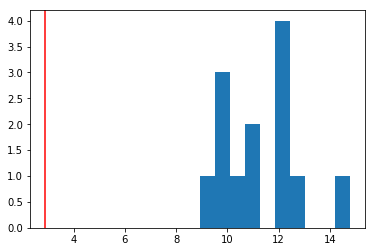

In [16]:
plt.hist(simulated_apls, bins=10)
plt.axvline(nx.average_shortest_path_length(G), color="r")

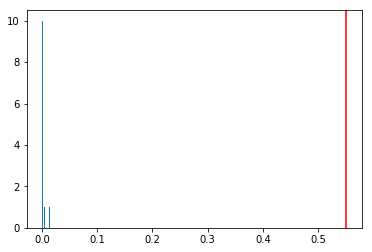

In [17]:
plt.hist(simulated_cc, bins=10)
plt.axvline(nx.average_clustering(G), color="r")

In [18]:
def run_simulations_pref(iters=10):
    degree_dist = []
    for i in range(iters):
        try:
            G = nx.barabasi_albert_graph(n=107, m=1)
            degree_dist.append([k[1] for k in G.degree])
        except:
            pass
    return degree_dist


In [19]:
degree_dists = run_simulations_pref(iters=20)

In [20]:
degree, counts = tuple(zip(*list(Counter(degree_dists[0]).items())))

In [21]:
counts, degree

((1, 2, 1, 76, 3, 1, 7, 14, 1, 1), (11, 9, 14, 1, 4, 21, 3, 2, 6, 5))

In [22]:
def get_degree_dist(dd, probs=False):
    degree, counts = tuple(zip(*[
        k for k in sorted(Counter(dd).items(), key=lambda x: x[0])
    ]))
    degree = np.array(degree)
    counts = np.array(counts)
    if probs:
        counts = 1-(counts.cumsum() / counts.sum())
    return degree, counts

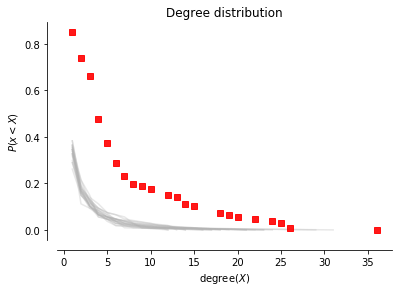

In [23]:
for dd in degree_dists:
    degree, counts = get_degree_dist(dd, probs=True)
    plt.plot(degree, counts, color="0.7", linestyle="-", alpha=0.3)
degree, counts = get_degree_dist([k[1] for k in G.degree], probs=True)
plt.plot(degree, counts, color="red", marker="s", linestyle="none", alpha=0.9)
plt.xlabel("degree$(X)$")
plt.ylabel("$P(x<X)$")
#plt.xscale("log")
#plt.yscale("log")
plt.title("Degree distribution")
sns.despine(offset=10)

In [24]:
df_metrics = get_all_node_metrics(G)

In [25]:
df_metrics.sort_values("closeness", ascending=False)

,degree,betweenness,closeness,eigenvector,clustering
Tyrion,0.339623,0.197913,0.512077,0.336638,0.180952
Sansa,0.245283,0.126720,0.509615,0.278782,0.252308
Robert,0.169811,0.209452,0.500000,0.199588,0.287582
Robb,0.235849,0.126964,0.488479,0.244845,0.240000
Arya,0.179245,0.079607,0.486239,0.222931,0.333333
Stannis,0.132075,0.102700,0.479638,0.167192,0.351648
Jaime,0.226415,0.099943,0.479638,0.273663,0.278986
Jon,0.245283,0.229965,0.479638,0.142455,0.156923
Tywin,0.207547,0.065538,0.469027,0.224856,0.229437
Eddard,0.113208,0.019341,0.460870,0.167606,0.545455


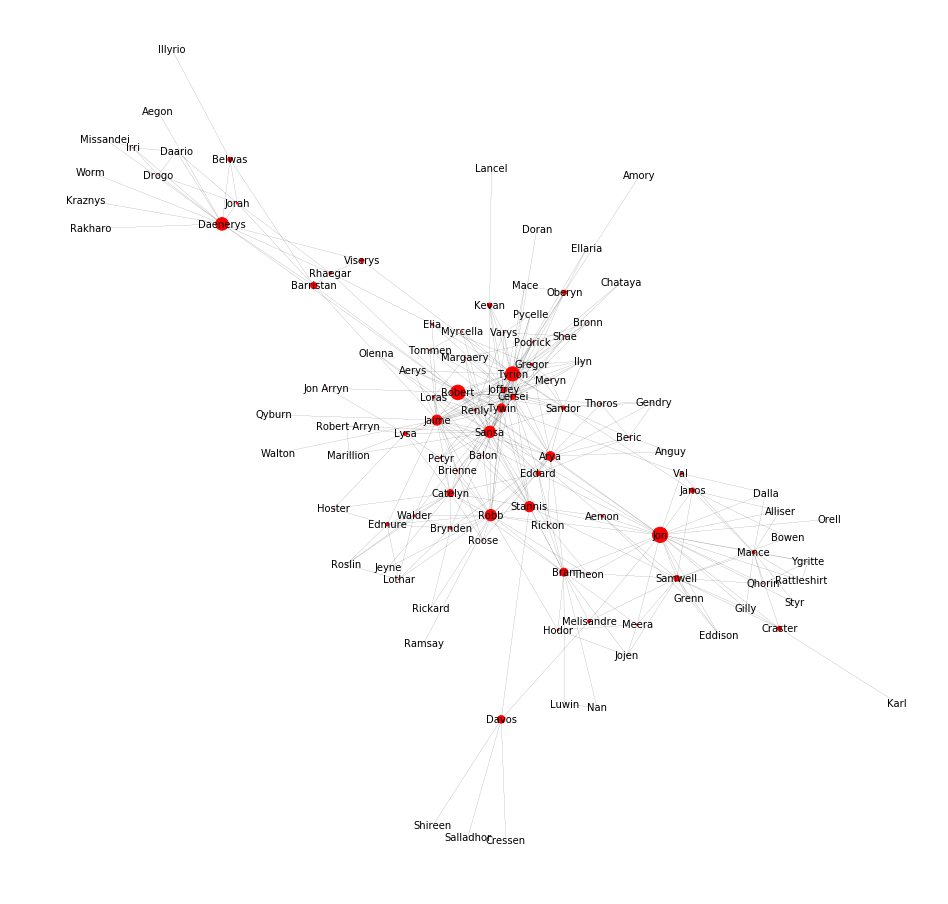

In [26]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_network(G, nx.betweenness_centrality(G), factor=1000, font_size=10, node_color="r", width=0.1)